In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set(context= 'talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42},palette='colorblind')

In [5]:
data=pd.read_csv('data/2M17D1.CSV',header=None).iloc[1:,:-1].drop(1,axis=1)
time=pd.to_datetime(data[0])
hrs=(time-time[1]).astype('timedelta64[s]').astype(int)/3600
data.index=hrs
data.index.name='Time (hrs)'
data=data.drop(0,axis=1)

data.columns=['%s%s'%(i,j) for i in 'ABCDEFGH' for j in range(1,9) ]
data

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,...,G7,G8,H1,H2,H3,H4,H5,H6,H7,H8
Time (hrs),,,,,,,,,,,,,,,,,,,,,
0.000000,1629,1619,1637,1629,1604,1614,1623,1614,1586,1587,...,1614,1597,1617,1595,1590,1618,1614,1605,1590,1604
0.335556,1599,1565,1641,1631,1580,1547,1607,1567,1518,1572,...,1581,1561,1597,1570,1567,1613,1602,1622,1554,1602
0.668889,1578,1537,1633,1626,1554,1501,1450,1531,1503,1564,...,1572,1533,1586,1564,1553,1603,1592,1624,1529,1605
1.002222,1570,1515,1638,1623,1543,1472,1399,1499,1486,1568,...,1568,1517,1593,1560,1543,1602,1591,1630,1511,1606
1.335556,1559,1500,1638,1628,1535,1454,1360,1473,1477,1565,...,1553,1496,1562,1557,1538,1596,1583,1637,1504,1607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333.679167,1895,2617,4068,3954,5372,2747,12227,1288,1719,2273,...,6243,1308,1548,2293,3310,4737,5149,5941,5335,1737
334.012500,1897,2616,4072,3954,5371,2745,12234,1291,1719,2271,...,6246,1312,1546,2304,3316,4730,5147,5940,5336,1737
334.345833,1893,2617,4068,3953,5367,2743,12231,1287,1720,2273,...,6245,1312,1549,2296,3311,4752,5147,5940,5334,1735


In [6]:
!mv ODin_Tube_Map2.xlsx data/ODin_Tube_Map_2M17D1.xlsx

In [7]:
layout=pd.read_excel('data/ODin_Tube_Map_2M17D1.xlsx',sheet_name='Layout')
layout=layout.dropna()
layout.index=layout.Position
layout.drop('Position',axis=1,inplace=True)
layout_dict=layout.to_dict()['Condition']
layout_dict

{'A1': 'A1',
 'A2': 'B1',
 'A3': 'C1',
 'A4': 'D1',
 'A5': 'E1',
 'A6': 'F1',
 'A7': 'G1',
 'A8': 'A9',
 'B1': 'A2',
 'B2': 'B2',
 'B3': 'C2',
 'B4': 'D2',
 'B5': 'E2',
 'B6': 'F2',
 'B7': 'G2',
 'B8': 'B9',
 'C1': 'A3',
 'C2': 'B3',
 'C3': 'C3',
 'C4': 'D3',
 'C5': 'E3',
 'C6': 'F3',
 'C7': 'G3',
 'C8': 'C9',
 'D1': 'A4',
 'D2': 'B4',
 'D3': 'C4',
 'D4': 'D4',
 'D5': 'E4',
 'D6': 'F4',
 'D7': 'G4',
 'D8': 'D9',
 'E1': 'A5',
 'E2': 'B5',
 'E3': 'C5',
 'E4': 'D5',
 'E5': 'E5',
 'E6': 'F5',
 'E7': 'G5',
 'E8': 'E9',
 'F1': 'A6',
 'F2': 'B6',
 'F3': 'C6',
 'F4': 'D6',
 'F5': 'E6',
 'F6': 'F6',
 'F7': 'G6',
 'F8': 'F9',
 'G1': 'A7',
 'G2': 'B7',
 'G3': 'C7',
 'G4': 'D7',
 'G5': 'E7',
 'G6': 'F7',
 'G7': 'G7',
 'G8': 'G9',
 'H1': 'A8',
 'H2': 'B8',
 'H3': 'C8',
 'H4': 'D8',
 'H5': 'E8',
 'H6': 'F8',
 'H7': 'G8'}

In [8]:
ODs=pd.read_excel('data/ODin_Tube_Map_2M17D1.xlsx',sheet_name='ODs',index_col=0)
ODs

,OD1,OD2
Condition,,
A1,0.005,0.030
A2,0.009,0.031
A3,0.012,0.039
A4,0.012,0.043
A5,0.007,0.031
...,...,...
G5,0.009,0.430
G6,0.009,0.400
G7,0.012,0.368


In [9]:
media=pd.read_excel('data/ODin_Tube_Map_2M17D1.xlsx',sheet_name='Conditions'
                   )
media.index=media.Condition
media_dict=media.Media.to_dict()
media_dict

{'A': '1 mM Nitrite',
 'B': '2.5 mM Nitrite',
 'C': '5 mM Nitrite',
 'D': '7.5 mM Nitrite',
 'E': '9 mM Nitrite',
 'F': '10 mM Nitrite',
 'G': '10 mM Nitrate'}

In [10]:
condition_dict={}
for key in layout_dict:
    item=layout_dict[key]
    if '11' in item or '12' in item:
        cond = media_dict[item[0]] + ',Blank'
    else:
        cond = media_dict[item[0]] + ',Rep%s'%(item[1:])
    condition_dict[key]=cond
condition_dict

{'A1': '1 mM Nitrite,Rep1',
 'A2': '2.5 mM Nitrite,Rep1',
 'A3': '5 mM Nitrite,Rep1',
 'A4': '7.5 mM Nitrite,Rep1',
 'A5': '9 mM Nitrite,Rep1',
 'A6': '10 mM Nitrite,Rep1',
 'A7': '10 mM Nitrate,Rep1',
 'A8': '1 mM Nitrite,Rep9',
 'B1': '1 mM Nitrite,Rep2',
 'B2': '2.5 mM Nitrite,Rep2',
 'B3': '5 mM Nitrite,Rep2',
 'B4': '7.5 mM Nitrite,Rep2',
 'B5': '9 mM Nitrite,Rep2',
 'B6': '10 mM Nitrite,Rep2',
 'B7': '10 mM Nitrate,Rep2',
 'B8': '2.5 mM Nitrite,Rep9',
 'C1': '1 mM Nitrite,Rep3',
 'C2': '2.5 mM Nitrite,Rep3',
 'C3': '5 mM Nitrite,Rep3',
 'C4': '7.5 mM Nitrite,Rep3',
 'C5': '9 mM Nitrite,Rep3',
 'C6': '10 mM Nitrite,Rep3',
 'C7': '10 mM Nitrate,Rep3',
 'C8': '5 mM Nitrite,Rep9',
 'D1': '1 mM Nitrite,Rep4',
 'D2': '2.5 mM Nitrite,Rep4',
 'D3': '5 mM Nitrite,Rep4',
 'D4': '7.5 mM Nitrite,Rep4',
 'D5': '9 mM Nitrite,Rep4',
 'D6': '10 mM Nitrite,Rep4',
 'D7': '10 mM Nitrate,Rep4',
 'D8': '7.5 mM Nitrite,Rep9',
 'E1': '1 mM Nitrite,Rep5',
 'E2': '2.5 mM Nitrite,Rep5',
 'E3': '5 mM Nitri

In [11]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

mapped['OD1']=np.nan
mapped['OD2']=np.nan
for i in mapped.index:
    pos = mapped.loc[i,'Layout']
    if pos in layout_dict:
        mapped.loc[i,['OD1','OD2']]=ODs.loc[layout_dict[pos]].values
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2
0,0.0000,A1,1629,"1 mM Nitrite,Rep1",0.005,0.030
1,0.0000,A2,1619,"2.5 mM Nitrite,Rep1",0.009,0.066
2,0.0000,A3,1637,"5 mM Nitrite,Rep1",0.007,0.115
3,0.0000,A4,1629,"7.5 mM Nitrite,Rep1",0.008,0.190
4,0.0000,A5,1604,"9 mM Nitrite,Rep1",0.006,0.237
...,...,...,...,...,...,...
64379,335.0125,H4,4734,"7.5 mM Nitrite,Rep8",0.014,0.187
64380,335.0125,H5,5145,"9 mM Nitrite,Rep8",0.006,0.210
64381,335.0125,H6,5940,"10 mM Nitrite,Rep8",0.004,0.247
64382,335.0125,H7,5336,"10 mM Nitrate,Rep8",0.009,0.221


In [12]:
reps=[]
conds=[]
for i in mapped.Condition:
    j=i.split(',')[0]
    if i != 'Empty':
        i=i.split(',')[1][3:]
    else:
        i=np.nan
    reps.append(i)
    conds.append(j)
mapped['media']=conds
mapped['replicate']=reps

#mapped=mapped[~mapped.Layout.isin(['H'+str(i) for i in range(1,9)])]
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2,media,replicate
0,0.0000,A1,1629,"1 mM Nitrite,Rep1",0.005,0.030,1 mM Nitrite,1
1,0.0000,A2,1619,"2.5 mM Nitrite,Rep1",0.009,0.066,2.5 mM Nitrite,1
2,0.0000,A3,1637,"5 mM Nitrite,Rep1",0.007,0.115,5 mM Nitrite,1
3,0.0000,A4,1629,"7.5 mM Nitrite,Rep1",0.008,0.190,7.5 mM Nitrite,1
4,0.0000,A5,1604,"9 mM Nitrite,Rep1",0.006,0.237,9 mM Nitrite,1
...,...,...,...,...,...,...,...,...
64379,335.0125,H4,4734,"7.5 mM Nitrite,Rep8",0.014,0.187,7.5 mM Nitrite,8
64380,335.0125,H5,5145,"9 mM Nitrite,Rep8",0.006,0.210,9 mM Nitrite,8
64381,335.0125,H6,5940,"10 mM Nitrite,Rep8",0.004,0.247,10 mM Nitrite,8
64382,335.0125,H7,5336,"10 mM Nitrate,Rep8",0.009,0.221,10 mM Nitrate,8


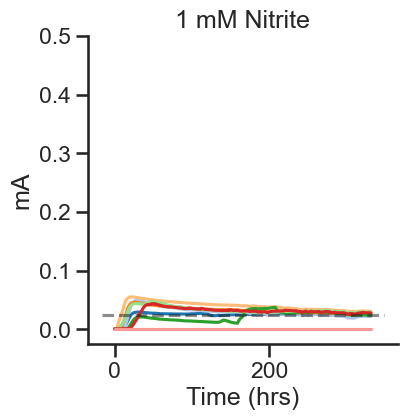

<Figure size 640x480 with 0 Axes>

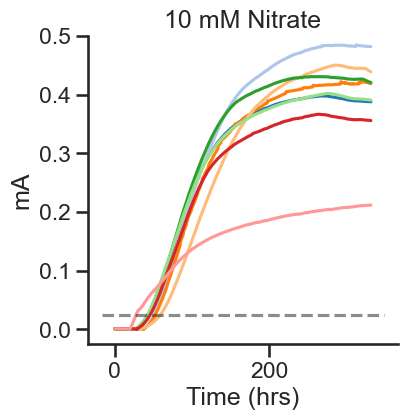

<Figure size 640x480 with 0 Axes>

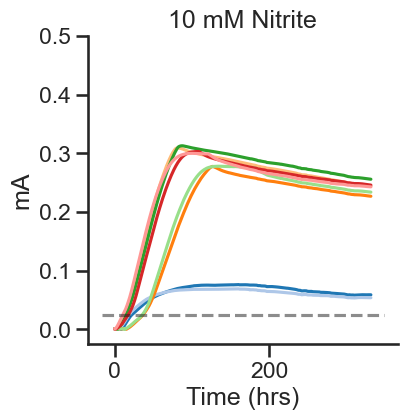

<Figure size 640x480 with 0 Axes>

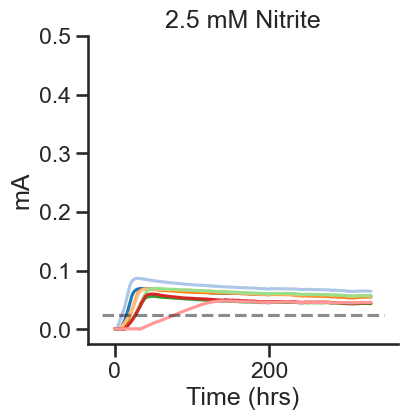

<Figure size 640x480 with 0 Axes>

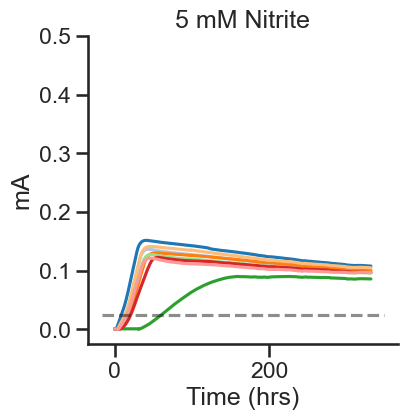

<Figure size 640x480 with 0 Axes>

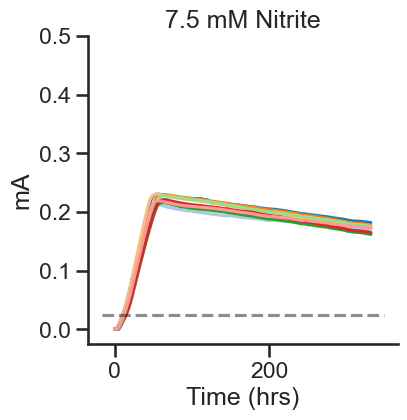

<Figure size 640x480 with 0 Axes>

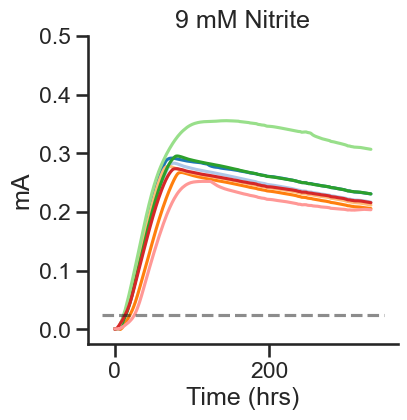

<Figure size 640x480 with 0 Axes>

In [13]:
from scipy.stats import linregress
colors=sns.color_palette('tab20',12)
lags={}
maxOD={}
for media,df in mapped.groupby(by='media'):
    if media =='Empty':
        break
    plt.figure(figsize=(4,4))
    plt.title(media)
    lags[media]=[]
    maxOD[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9':
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        y3=y3-y3[0]
        y3[y3<=0]=0.001
        if len(x2[y3>.025]) > 0:
            lag=x2[y3>.025][0]
        else:
            lag=x2[-1]
        lags[media].append(lag)
        maxOD[media].append(y3.max())
        #y2=y2/y2.max()
        plt.plot(x2,y3,color=colors[i])
        i+=1
    plt.xlabel('Time (hrs)')
    plt.ylabel('mA')
    plt.ylim(-.025,.5)
    plt.plot(plt.xlim(),(.025,.025),'k--',alpha=0.5)
    plt.show()
    plt.clf()

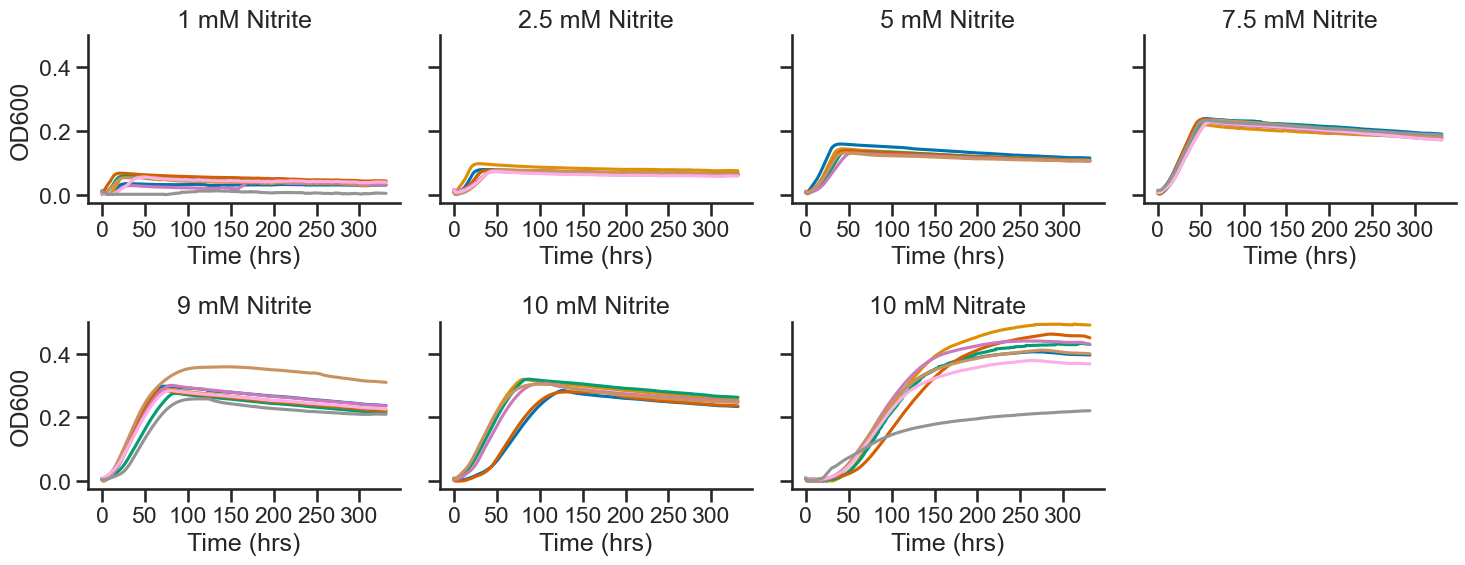

In [14]:
colors=sns.color_palette('colorblind',9)
maxOD={}
fig= plt.figure(figsize=(15,6))
trash=[('5 mM Nitrite', '4'),('5 mM Nitrite', '5'),('2.5 mM Nitrite', '8'),('10 mM Nitrite', '1'),('10 mM Nitrite', '2')]
j=1
res=pd.DataFrame()
for media in ['1 mM Nitrite', '2.5 mM Nitrite', '5 mM Nitrite', '7.5 mM Nitrite','9 mM Nitrite',
       '10 mM Nitrite', '10 mM Nitrate']:
    df = mapped[mapped.media==media]
    if media =='Empty':
        break
    ax=fig.add_subplot(2,4,j)
    ax.set_title(media)
    lags[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9' or (media,rep) in trash:
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        y3[y3<=0]=0.001
        #x2= x2[y3>=10**-2]
        #y3=y3[y3>=10**-2]
        ax.plot(x2,y3,color=colors[i])
        i+=1
        od=pd.DataFrame([x2,y3]).T
        od.columns=['Time (hrs)','OD600']
        od['media']=media
        od['replicate']=rep
        res=pd.concat([res,od])
    plt.ylim(-.025,.5)
    if j != 1 and j != 5:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('OD600')
    ax.set_xlabel('Time (hrs)')
    j+=1
    ax.set_xticks([0,50,100,150,200,250,300])
    #ax.set_yscale('log')
    #ax.set_ylim(10**-2,1)
plt.tight_layout()
#plt.savefig('R12-ODin-OD600-Nitrite-repeat.png',dpi=250,bbox_inches='tight')

(-0.01, 0.5)

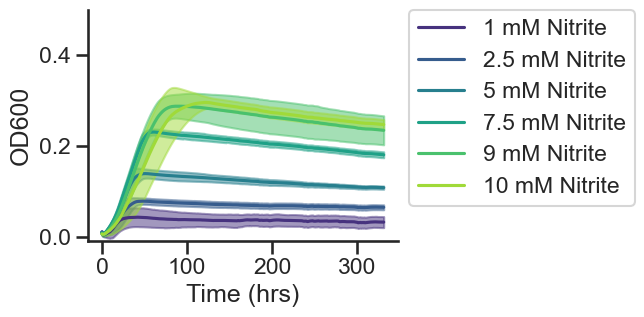

In [15]:
res.replicate=res.replicate.astype(int)
mean=res.groupby(by=['media','Time (hrs)']).mean()
std=res.groupby(by=['media','Time (hrs)']).std()
conditions=['1 mM Nitrite', '2.5 mM Nitrite', '5 mM Nitrite', '7.5 mM Nitrite',
       '9 mM Nitrite', '10 mM Nitrite']
colors=sns.color_palette('viridis',6)
plt.figure(figsize=(4,3))
i=0
for idx in conditions:
    
    df=mean.loc[idx].reset_index()
    #df['OD600']=df['OD600']-df['OD600'].min()
    err=std.loc[idx].reset_index()
    plt.plot(df['Time (hrs)'],df['OD600'],label=idx,color=colors[i])
    plt.fill_between(df['Time (hrs)'].values,df['OD600'].values-err['OD600'].values,df['OD600'].values+err['OD600'].values,alpha=0.5,color=colors[i])
   
    i+=1
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend(bbox_to_anchor=(1,1.05),loc=2)

#plt.yscale('log')
#plt.xlim(0,50)
plt.ylim(-.01,0.5)
#plt.yscale('log')
#plt.ylim(10**-3,2*10**-1)
#plt.savefig('R12-N02-yield.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'R12')

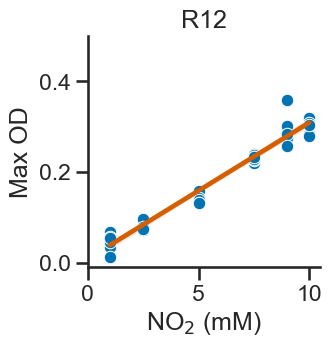

In [16]:
maxod=res[res.media.isin(conditions)].groupby(by=['media','replicate']).max().reset_index()
maxod['nitrite']=[float(x.split()[0]) for x in maxod.media]
plt.figure(figsize=(3,3))
sns.regplot(x='nitrite',y='OD600',data=maxod,scatter=False,color='r')
sns.scatterplot(x='nitrite',y='OD600',data=maxod)
plt.ylim(-.01,0.5)
plt.xlim(0,10.5)
plt.xlabel('NO$_2$ (mM)')
plt.ylabel('Max OD')
plt.title('R12')
#plt.savefig('R12-NO2-maxOD.pdf',bbox_inches='tight')

<Axes: xlabel='media', ylabel='OD600'>

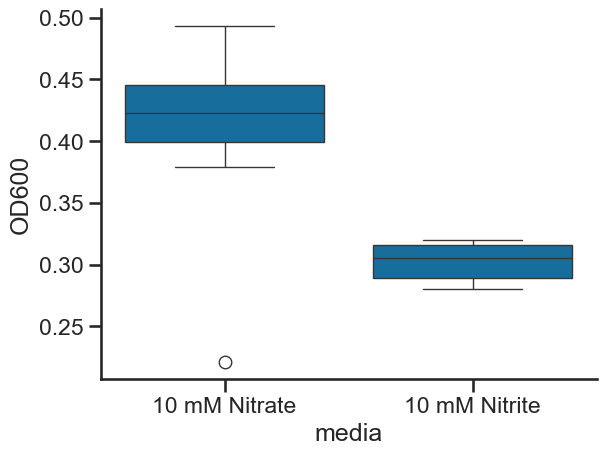

In [17]:
maxod=res.groupby(by=['media','replicate']).max().reset_index()
sns.boxplot(x='media',y='OD600',data=maxod[maxod.media.isin(['10 mM Nitrite','10 mM Nitrate'])])